In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils_fig as uf
import power_utils as pu

from importlib import reload

import sys
sys.path.append("../include")
import hhtools
import hhsignal

sys.path.append("../extract_osc_motif/")
import oscdetector as od

uf.set_plt()

reload(pu)

<module 'power_utils' from '/home/jungyoung/Project/hh_neuralnet/figures/power_utils.py'>

# Schematics of MFOP (Artificial spectrogram)

In [2]:
freq_fast = 40
freq_slow = 30

def gen_signal(tmax, t_pts, f):
    srate = 2000
    t = np.arange(0, tmax, 1/srate)
    y = np.zeros_like(t)
    
    s = 0.2
    for t0 in t_pts:
        assert t0 < tmax
        n0 = int(t0*srate)
        nw = int(10*s*srate)
        
        tsub = np.arange(-nw, nw+1)/srate
        ysub = np.cos(2*np.pi*f*tsub) * np.exp(-tsub**2/s) * 0.5
        
        y[n0-nw:n0+nw+1] += ysub
    
    return t, y


def show_schem_spec(psd, tpsd, fpsd, pop_txt="Fast", cmap="jet"):
    vmin, vmax = None, None
    if "RdBu" in cmap:
        # vmin, vmax = -5, 5
        vmin, vmax = -0.2, 0.2
        # psd = (psd - psd.mean(axis=1, keepdims=True))/psd.std(axis=1, keepdims=True)
    
    plt.imshow(psd, extent=(tpsd[0], tpsd[-1], fpsd[0], fpsd[-1]), aspect="auto", origin="lower", cmap=cmap, vmin=vmin, vmax=vmax)
    # plt.yticks([freq_slow, freq_fast], labels=["slow", "fast"])
    plt.xticks([])
    plt.yticks([])
    plt.ylim([freq_slow-5, freq_fast+5])
    plt.ylabel("Frequency (Hz)", fontsize=5)
    
    # put pop text
    xl = plt.xlim()
    yl = plt.ylim()
    
    x0 = xl[0]+0.15*(xl[1]-xl[0])
    y0 = yl[1]-0.15*(yl[1]-yl[0])
    
    plt.text(x0, y0, pop_txt, color="w", ha="center", va="center", fontsize=6, fontweight="bold")
    

In [1792]:
# Landmark 7 - mostly F[f-]S[--], F[--]S[-s], rarely F[fs]S[fs]

srate = 2000
tmax = 20
# an = 1.2
an = 0.5

np.random.seed(42)

t, yf1 = gen_signal(tmax, [4.8, 8, 15.2,], freq_fast)
t, yf2 = gen_signal(tmax, [5, 15], freq_slow)
yf = yf1 + yf2 + an*np.random.randn(len(t))

t, ys1 = gen_signal(tmax, [5, 15], freq_fast)
t, ys2 = gen_signal(tmax, [2, 5.2, 12, 15.1], freq_slow)
ys = ys1 + ys2 + an*np.random.randn(len(t))

psd_s, fpsd, tpsd = hhsignal.get_stfft(ys, t, srate, mbin_t=0.1, wbin_t=1, frange=(1, 100))
psd_f, fpsd, tpsd = hhsignal.get_stfft(yf, t, srate, mbin_t=0.1, wbin_t=1, frange=(1, 100))

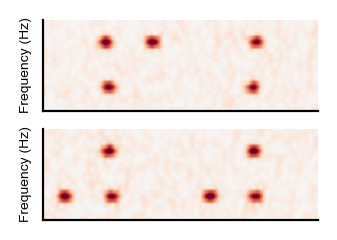

In [1793]:
plt.figure(figsize=(4.5*uf.cm, 3.3*uf.cm), dpi=200)
plt.subplot(211)
show_schem_spec(psd_f, tpsd, fpsd, pop_txt="", cmap="RdBu_r")

plt.subplot(212)
show_schem_spec(psd_s, tpsd, fpsd, pop_txt="", cmap="RdBu_r")

# uf.save_fig("fig3_schem_l7")
plt.show()

In [1795]:
# Landmark 5 - mostly F[f-]S[--], F[--]S[fs], rarely F[fs]S[fs]

srate = 2000
tmax = 20
an = 0.5

np.random.seed(42)

t, yf1 = gen_signal(tmax, [2, 2.8, 10, 14, 17], freq_fast)
t, yf2 = gen_signal(tmax, [], freq_slow)
yf = yf1 + yf2 + an*np.random.randn(len(t))

t, ys1 = gen_signal(tmax, [2.2, 14], freq_fast)
t, ys2 = gen_signal(tmax, [2, 6, 10, 14.1], freq_slow)
ys = ys1 + ys2 + an*np.random.randn(len(t))

psd_s, fpsd, tpsd = hhsignal.get_stfft(ys, t, srate, mbin_t=0.1, wbin_t=1, frange=(1, 100))
psd_f, fpsd, tpsd = hhsignal.get_stfft(yf, t, srate, mbin_t=0.1, wbin_t=1, frange=(1, 100))

Saved figure to fig3_schem_l5


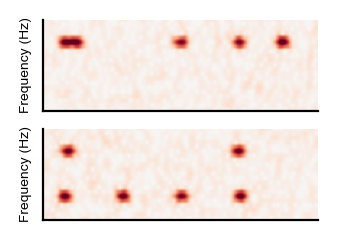

In [1796]:
plt.figure(figsize=(4.5*uf.cm, 3.3*uf.cm), dpi=200)
plt.subplot(211)
show_schem_spec(psd_f, tpsd, fpsd, pop_txt="", cmap="RdBu_r")

plt.subplot(212)
show_schem_spec(psd_s, tpsd, fpsd, pop_txt="", cmap="RdBu_r")

uf.save_fig("fig3_schem_l5")
plt.show()

In [7]:
# Landmark 4 - mostly F[fs]S[-s], F[--]S[-s], rarely F[fs]S[fs]

srate = 2000
tmax = 20
# an = 1.2
an = 0.5

np.random.seed(42)

t, yf1 = gen_signal(tmax, [4.8, 8, 13.8,], freq_fast)
t, yf2 = gen_signal(tmax, [8.2, 14, 17.2], freq_slow)
yf = yf1 + yf2 + an*np.random.randn(len(t))

t, ys1 = gen_signal(tmax, [8.1, 14], freq_fast)
t, ys2 = gen_signal(tmax, [2, 2.8, 8, 14, 17], freq_slow)
ys = ys1 + ys2 + an*np.random.randn(len(t))

psd_s, fpsd, tpsd = hhsignal.get_stfft(ys, t, srate, mbin_t=0.1, wbin_t=1, frange=(1, 100))
psd_f, fpsd, tpsd = hhsignal.get_stfft(yf, t, srate, mbin_t=0.1, wbin_t=1, frange=(1, 100))

Saved figure to fig3_schem_l4


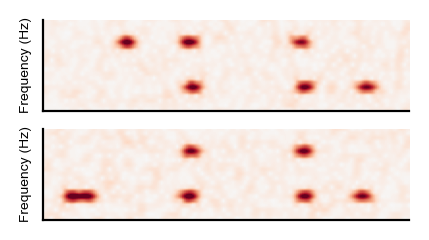

In [10]:
plt.figure(figsize=(6*uf.cm, 3.3*uf.cm), dpi=200)
plt.subplot(211)
show_schem_spec(psd_f, tpsd, fpsd, pop_txt="", cmap="RdBu_r")

plt.subplot(212)
show_schem_spec(psd_s, tpsd, fpsd, pop_txt="", cmap="RdBu_r")

uf.save_fig("fig3_schem_l4")
plt.show()

# number of bursting states

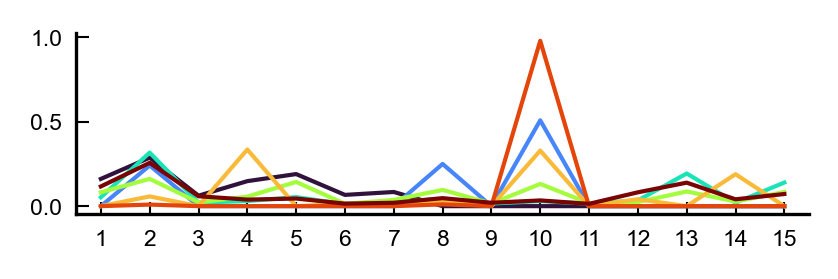

In [1635]:
num_winfos_tot = np.zeros((7, 16))
for nc in range(7):
    cid = nc + 1
    winfos = uf.load_pickle("../extract_osc_motif/data/osc_motif/motif_info_%d.pkl"%(cid))["winfo"]
    num_winfos_tot[nc] = [len(w) for w in winfos]
# num_winfos_tot[:,0] = np.nan
num_winfos_tot[:,0] = 0
num_winfos_tot = num_winfos_tot / num_winfos_tot.sum(axis=1, keepdims=True)
num_winfos_tot[:,0] = np.nan

plt.figure(figsize=(8*uf.cm, 2*uf.cm), dpi=300)
for nc in range(7):
    plt.plot(np.arange(16), num_winfos_tot[nc], c=get_cid_color(nc+1), lw=1)
plt.xticks(np.arange(16))
plt.xlim([0.5, 15.5])
plt.show()

In [1687]:
cax

Saved figure to fig3_num_motif


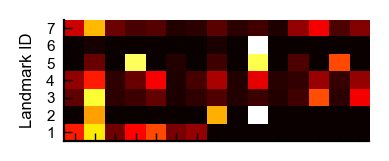

Saved figure to fig3_num_motif_ax


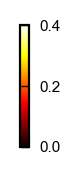

In [1700]:


plt.figure(figsize=(5.*uf.cm, 2*uf.cm), dpi=200)
cobj = plt.imshow(num_winfos_tot, cmap="hot", origin="lower", extent=(-0.5, 15.5, 0.5, 7.5), vmin=0, vmax=0.4, aspect="auto")
plt.xticks(np.arange(16), labels=[])
plt.xlim([0.5, 15.5])
plt.yticks(np.arange(8))
plt.ylim([0.5, 7.5])
plt.ylabel("Landmark ID")

uf.save_fig("fig3_num_motif")
plt.show()

fig, ax = plt.subplots(1,1,figsize=(0.15*uf.cm, 2*uf.cm), dpi=200)
plt.colorbar(cobj, cax=ax, shrink=0.4)
uf.save_fig("fig3_num_motif_ax")

Saved figure to fig3_xaxis


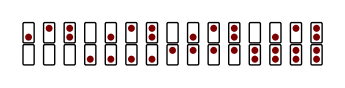

In [1684]:
fig, axs = plt.subplots(1, 15, figsize=(5.*uf.cm, 0.8*uf.cm), dpi=200)
# ax = plt.axes((0.1, 0.1, 0.7, 0.8))
for n in range(15):
    plt.sca(axs[n])
    draw_motif_pictogram(od.get_motif_labels()[n+1])
uf.save_fig("fig3_xaxis")
plt.show()

In [ ]:
# set cid first
cid = 5
period_set = get_period(cid)

winfos = uf.load_pickle("../extract_osc_motif/data/osc_motif/motif_info_%d.pkl"%(cid))["winfo"]
num_winfos = [len(w) for w in winfos]
num_winfos[0] = np.nan

plt.figure(figsize=(8*uf.cm, 2*uf.cm), dpi=300)
plt.bar(np.arange(16), num_winfos)
plt.xticks(np.arange(1, 16), labels=od.get_motif_labels()[1:], rotation=45)
plt.show()

# Histogram with delay

In [2333]:
!mkdir figures/fig3_hist_random

In [2340]:
reload(uf)

<module 'utils_fig' from '/home/jungyoung/Project/hh_neuralnet/figures/utils_fig.py'>

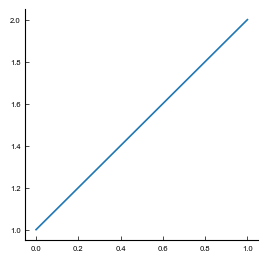

In [2341]:
plt.figure(figsize=(3,3), facecolor="none")
plt.plot([1,2])

In [ ]:
N = 1000


np.random.seed(42)
seed_set = np.random.randint(0, high=100000, size=20)

for n, seed in enumerate(seed_set):
    
    np.random.seed(seed)
    x = np.random.randn(N) + np.random.uniform()*1
    y = np.random.randn(N) + np.random.uniform()*1

    bins, xe, ye = np.histogram2d(x, y, bins=[np.linspace(-3.5, 3.5, 51), np.linspace(-3.5, 3.5, 51)])
    xe = (xe[1:] + xe[:-1])/2
    ye = (ye[1:] + ye[:-1])/2

    fig = plt.figure(figsize=(2*uf.cm, 2*uf.cm), dpi=100)
    ax = fig.add_subplot(111, projection="3d")

    X, Y = np.meshgrid(xe, ye)
    z = bins.ravel()
    zmax = z.max()
    # z[z==0] = np.nan
    cmap = plt.get_cmap("jet")
    ax.bar3d(X.ravel(), Y.ravel(), np.zeros_like(bins).ravel(), 1, 1, 
             z, shade=True,
             color=cmap(z/zmax), alpha=0.7)
    plt.axis("off")
    
    uf.save_fig("fig3_hist_random/random%02d"%(n))
    
    plt.show()

# Information routing patterns

## Compare within the same landmarks

In [2292]:
sys.path.append("../information_routing/")
sys.path.append("../extract_osc_motif/")

import tetools as tt
import visu
import os
import oscdetector as od
from scipy.signal import find_peaks

te_dir = "../information_routing/data/te_2d_newmotif_newsurr"
te_colors = ("#d92a27", "#045894", "#a9a9a9")
c_rect = "#676767"

# configure period_cut
amp_range_tot = uf.load_pickle("../extract_osc_motif/data/osc_motif/amp_range_set.pkl")["amp_range_set"]

def get_period(cid):
    # use amp_range_tot
    amp_range = amp_range_tot[cid-1]
    
    fmeans = [-1, -1]    
    for nf in range(2):
        if len(amp_range["fpop"][nf]) == 0 and len(amp_range["spop"][nf]) == 0:
            continue
        elif len(amp_range["fpop"][nf]) == 0:
            fmeans[nf] = np.mean(amp_range["spop"])
        elif len(amp_range["spop"][nf]) == 0:
            fmeans[nf] = np.mean(amp_range["fpop"])
        else:
            fmeans[nf] = np.mean(list(amp_range["spop"][nf]) + list(amp_range["fpop"][nf]))
    
    return [1e3/f for f in fmeans] # converted to ms


def find_sig_times(x1_mean, is_overlap):
    idx_non_overlap = tt.bool2ind(~is_overlap)
    
    # find peaks
    loc_p, _ = find_peaks(x1_mean)
    loc_t, _ = find_peaks(-x1_mean)
    loc_p = loc_p.reshape(-1, 1)
    loc_t = loc_t.reshape(-1, 1)
    
    # find nearest peak / trough
    idx_sig_peak = []
    for idx in idx_non_overlap:
        arr = np.arange(idx[0], idx[1]+1).reshape(1, -1)
        dmin_p = np.min(np.abs(loc_p - arr), axis=0)
        dmin_t = np.min(np.abs(loc_t - arr), axis=0)
        
        # if np.any(dmin_p < dmin_t):
        # print(np.sum(dmin_p < dmin_t), len(dmin_p)*0.1)
        if np.sum(dmin_p < dmin_t) > len(dmin_p) * 0.1:
            idx_sig_peak.append(idx)
        
    # get significant times
    tsig_set = []
    for idx in idx_sig_peak:
        tsig_set.append(tlag[idx])
        
    return tsig_set

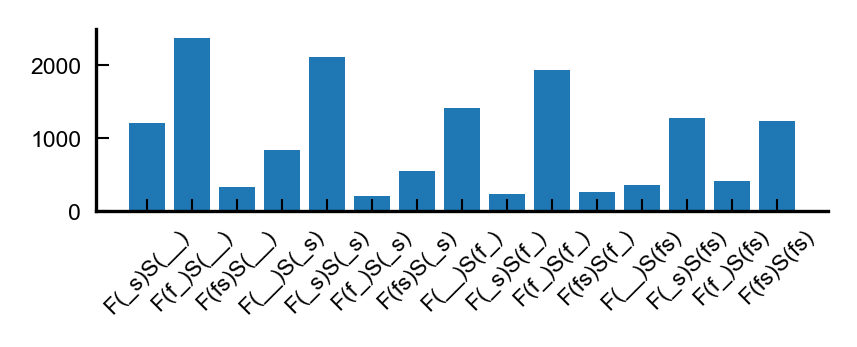

In [2293]:
# set cid first
cid = 4
period_set = get_period(cid)

winfos = uf.load_pickle("../extract_osc_motif/data/osc_motif/motif_info_%d.pkl"%(cid))["winfo"]
num_winfos = [len(w) for w in winfos]
num_winfos[0] = np.nan

plt.figure(figsize=(8*uf.cm, 2*uf.cm), dpi=300)
plt.bar(np.arange(16), num_winfos)
plt.xticks(np.arange(1, 16), labels=od.get_motif_labels()[1:], rotation=45)
plt.show()

# shared parameters when drawing TE
# p_ranges = (2.5, 97.5)
p_ranges = (5, 95)
opt = dict(alpha=0.5, avg_method='median', p_range=p_ranges)
opt_line = dict(linestyle="-", linewidth=0.5)
opt_noline = dict(linestyle="none")

yl = [0, 0.1]
ybar = 0.085
lb_pop = ("F", "S")

# fig size
# figsize_te = (3.6*uf.cm, 6*uf.cm)
figsize_te = (2.5*uf.cm, 6*uf.cm)
figsize_full = (2.6*uf.cm, 2.*uf.cm)
figsize_reduce = (2.6*uf.cm, 1.5*uf.cm)
# figsize_full = (3.5*uf.cm, 2.5*uf.cm)
# figsize_reduce = (3.5*uf.cm, 1.5*uf.cm)

### wid=5; F[_s]S[_s]

In [2297]:
# set winfo
wid = 10
print(od.get_motif_labels()[wid])

tcut = period_set[0]
if tcut < 0:
    tcut = 40
te_data_2d = uf.load_pickle(os.path.join(te_dir, "te_%d%02d.pkl"%(cid, wid)))
te_data = tt.reduce_te_2d(te_data_2d, tcut=tcut)

te_data_2d_b = uf.load_pickle(os.path.join(te_dir, "te_%d%02d.pkl"%(cid, 0)))
te_data_b = tt.reduce_te_2d(te_data_2d_b, tcut=tcut)

tlag = te_data["tlag"]

F(f_)S(f_)


Saved figure to fig3_te410_concat


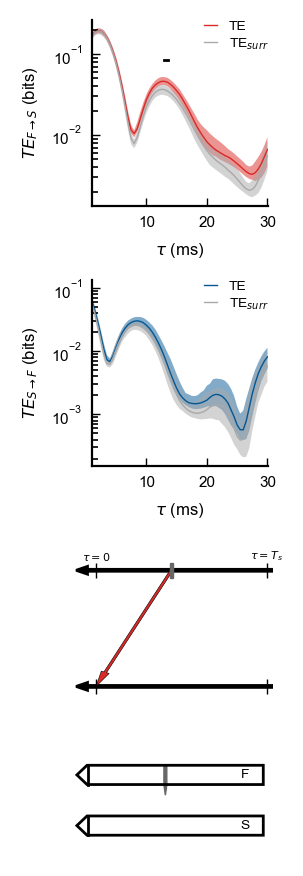

In [2298]:
# Draw full maps

tsig_sets = []

plt.figure(figsize=(2.8*uf.cm, 11.8*uf.cm), dpi=200)

# Draw full TE
for nd in range(2):
    plt.axes([0.12, 0.75-0.28*nd, 0.8, 0.2])
    
    x1 = te_data["te"][:,nd,:]
    x2 = te_data["te_surr"][:,nd,:]
    tlag = te_data["tlag"]
    
    visu.draw_with_err(tlag, x1, c=te_colors[nd], **opt, **opt_noline) # TE
    visu.draw_with_err(tlag, x2, c=te_colors[2], **opt, **opt_noline) # TE surrogate
    ax1, = plt.plot(tlag, np.median(x1, axis=0), c=te_colors[nd], **opt_line)
    ax2, = plt.plot(tlag, np.median(x2, axis=0), c=te_colors[2], **opt_line)
    
    x1_mean = np.median(x1, axis=0)
    is_overlap = tt.check_overlap(x1, x2, p_ranges)
    tsig_sets.append(
        find_sig_times(x1_mean, is_overlap)
    )

    # get significant times
    for tsig in tsig_sets[-1]:
        plt.plot(tsig, [ybar]*2, c="k", lw=1)
    
    plt.xlim([1, tcut])
    # plt.ylim([0, 0.1])
    plt.gca().set_yscale("log")
    # plt.ylim([-1e-3, 1e-1])
    
    # if nd == 1: plt.xlabel(r"$\tau$ (ms)")
    plt.xlabel(r"$\tau$ (ms)")
    plt.ylabel(r"$TE_{%s \rightarrow %s}$ (bits)"%(lb_pop[nd], lb_pop[1-nd]))
    
    plt.legend([ax1, ax2], ("TE", r"TE$_{surr}$"), fontsize=5,
               loc="upper right", edgecolor="none", facecolor="none",
               borderpad=0, borderaxespad=0, handlelength=1, handletextpad=0.8, labelspacing=0.25)

    
# Draw full TE
plt.axes([0.01, 0.22, 0.93, 0.15])
visu.draw_te_diagram_full(tsig_sets, xmax=30, y0=30,
                         colors_arrow=te_colors,
                         colors_rect=[c_rect]*2)

plt.axes([0.01, 0.05, 0.93, 0.12])

# visu.draw_te_diagram_reduce(tsig_sets, xmax=30, y0=5, colors=[c_rect]*2)

xmax = period_set[0]
box_height = 2
visu.draw_round_rect(tsig_sets[0], xmax=xmax, y=y0, color=c_rect, rect_type="sharp", h=box_height,
             alpha=1, lw=0.5, show_arrow=True, arrow_h=-box_height/2)
visu.draw_round_rect(tsig_sets[1], xmax=xmax, y=0, color=c_rect, rect_type="sharp", h=box_height,
             alpha=1, lw=0.5, show_arrow=True, arrow_h=box_height/2)
visu.draw_reduce_axis(xmax=xmax, width=box_height*1.2, y=y0)
plt.ylim([-3, y0+3])


uf.save_fig("fig3_te%d%02d_concat"%(cid,wid))
plt.show()

In [ ]:
from matplotlib import patches
from matplotlib.colors import to_rgb



id_sync = 2
# 7
a = 0.57
b = 0.14
w = 0.15

# 5
# a = 0.85
# b = 0.5
# w = -0.3

# 4
a = 1.14
b = 0.29
w = 0.15


def draw_landmark_diagram(a=1, b=1, w=1, id_sync=1):
    
    color_edge = (0.4, 0.4, 0.4)
    color_sync = ("#6d6e71", "#a7a9ac", "#e6e7e8")
    color_e = "#a82a2f"
    color_i = ("#2e3191", "#387a63")
    r = 2
    d = 0.2

    a_max = 1.3
    b_max = 1
    w_max = 1
    mul = 1.5
    
    fig, ax = plt.subplots(figsize=(5*uf.cm, 5*uf.cm), dpi=150)

    xf, xs = 0, 9/2*r
    r1 = patches.Circle((xf, r), r, facecolor=color_sync[id_sync], edgecolor=color_edge, lw=0.2)
    r2 = patches.Circle((xs, r), r, facecolor=color_sync[id_sync], edgecolor=color_edge, lw=0.2)
    ax.add_patch(r1)
    ax.add_patch(r2)

    x1, x2 = xf+r+0.5, xs-r-0.5
    wf = 1 - w if w > 0 else 1
    ws = 1 + w if w < 0 else 1

    a_f, b_f = a*wf/a_max*mul, b*wf/b_max*mul
    a_s, b_s = a*ws/a_max*mul, b*ws/b_max*mul

    # draw inhibitory neuron
    bmax, bmin = max(b_f, b_s), min(b_f, b_s)
    d_i = (3/4*bmax + bmin/2 + d)/2

    xy_f, w_f = [x1, r+d_i-b_f/2], x2-x1-3/4*b_f
    xy_s, w_s = [x1+3/4*b_s, r-d_i-b_s/2], x2-x1-3/4*b_s
    y_f = xy_f[1]+5/4*b_f+3/4*a_f + 0.2
    y_s = xy_s[1]-1/4*b_s-3/4*a_s - 0.2

    d2 = y_f - ((y_f - y_s)/2 + r)
    xy_f[1] -= d2
    xy_s[1] -= d2
    y_f -= d2
    y_s -= d2

    dr_f, dr_s = y_f-r, r-y_s

    ri_f = patches.Rectangle(xy_f, w_f, b_f, color=color_i[0], lw=0)
    ci_f = patches.Circle((xy_f[0]+w_f, xy_f[1]+b_f/2), 3/4*b_f, color=color_i[0], lw=0)
    ri_s = patches.Rectangle(xy_s, w_s, b_s, color=color_i[1], lw=0)
    ci_s = patches.Circle((xy_s[0], xy_s[1]+b_s/2), 3/4*b_s, color=color_i[1], lw=0)

    re_f = patches.Rectangle((x1, y_f-a_f/2), x2-x1, a_f, color=color_e, lw=0)
    te_f = patches.Polygon([(x2, y_f-3/4*a_f), (x2, y_f+3/4*a_f), (x2-r/2, y_f)], color=color_e)
    re_s = patches.Rectangle((x1, y_s-a_s/2), x2-x1, a_s, color=color_e, lw=0)
    te_s = patches.Polygon([(x1, y_s-3/4*a_s), (x1, y_s+3/4*a_s), (x1+r/2, y_s)], color=color_e)

    ax.add_patch(ri_f)
    ax.add_patch(ci_f)
    ax.add_patch(ri_s)
    ax.add_patch(ci_s)

    ax.add_patch(re_f)
    ax.add_patch(te_f)
    ax.add_patch(re_s)
    ax.add_patch(te_s)

    plt.xlim([xf-r-0.2, xs+r+0.2])
    plt.ylim([xf-r-0.2-2, xs+r+0.2-2])
    plt.xticks(np.linspace(xf-r-0.2, xs+r+0.2, 5))
    plt.axis("equal")
    plt.axis("off")
    
    return fig


points = [
    dict(a=1.29, b=0.5, w=0.85, id_sync=0),
    dict(a=1, b=0.78, w=-0.3, id_sync=0),
    dict(a=1.28, b=0.71, w=0.9, id_sync=2),
    dict(a=1.14, b=0.29, w=0.15, id_sync=1),
    dict(a=0.85, b=0.5, w=-0.3, id_sync=2),
    dict(a=0.85, b=0.85, w=-0.3, id_sync=2),
    dict(a=0.57, b=0.14, w=0.15, id_sync=2)
]


for n, pt in enumerate(points):
    print("#%d"%(n))
    fig = draw_landmark_diagram(**pt)
    uf.save_fig("fig2_landmark%d"%(n+1))
    plt.show()


#  reduced TE diagram
Iterate over different cid

Saved figure to fig3_te/num_motif_7


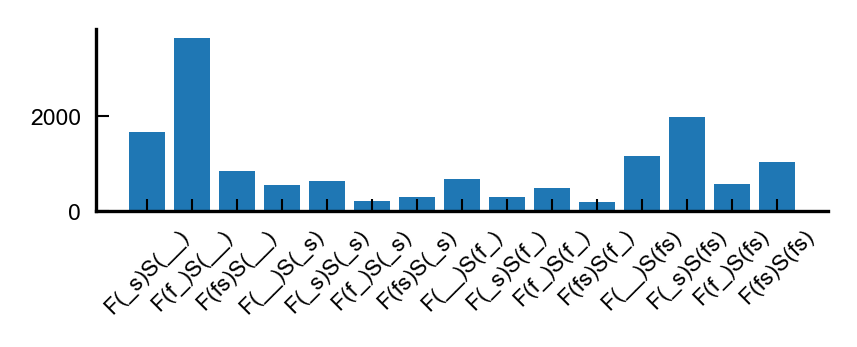

In [1730]:
# set cid first
cid = 7
period_set = get_period(cid)
if period_set[0] < 0: period_set[0] = 40

winfos = uf.load_pickle("../extract_osc_motif/data/osc_motif/motif_info_%d.pkl"%(cid))["winfo"]
num_winfos = [len(w) for w in winfos]
num_winfos[0] = np.nan

plt.figure(figsize=(8*uf.cm, 2*uf.cm), dpi=300)
plt.bar(np.arange(16), num_winfos)
plt.xticks(np.arange(1, 16), labels=od.get_motif_labels()[1:], rotation=45)
uf.save_fig("fig3_te/num_motif_%d"%(cid))
plt.show()

# shared parameters when drawing TE
# p_ranges = (2.5, 97.5)
p_ranges = (5, 95)
opt = dict(alpha=0.5, avg_method='median', p_range=p_ranges)
opt_line = dict(linestyle="-", linewidth=0.5)
opt_noline = dict(linestyle="none")

yl = [0, 0.1]
ybar = 0.085
lb_pop = ("F", "S")

# fig size
figsize_te = (3.6*uf.cm, 6*uf.cm)
figsize_full = (3.5*uf.cm, 2.5*uf.cm)
figsize_reduce = (3.5*uf.cm, 1.5*uf.cm)

In [ ]:
# p_ranges = (5, 95)
# p_ranges = (2.5, 97.5)
p_ranges = (5, 95)

for wid in range(16):
    try:
        te_data_2d = uf.load_pickle(os.path.join(te_dir, "te_%d%02d.pkl"%(cid, wid)))
    except FileNotFoundError:
        continue
    if wid == 0: continue
        
    te_data = tt.reduce_te_2d(te_data_2d, tcut=period_set[0])
    tlag = te_data["tlag"]
    
    tsig_sets = [[], []]
    for nd in range(2):
        x1 = te_data["te"][:,nd,:]
        x2 = te_data["te_surr"][:,nd,:]
        
        x1_mean = np.median(x1, axis=0)
        is_overlap = tt.check_overlap(x1, x2, p_ranges)
        
        tsig_sets[nd] = find_sig_times(x1_mean, is_overlap)

    plt.figure(figsize=figsize_reduce, dpi=300)
    plt.axes((0.1, 0.15, 0.15, 0.7))
    draw_motif_pictogram(od.get_motif_labels()[wid], rcolor=get_cid_color(cid))
    
    plt.axes((0.22, 0.1, 0.5, 0.8))
    visu.draw_te_diagram_reduce(tsig_sets, xmax=period_set[0], y0=5, colors=[uf.brighten_hex(c) for c in te_colors[:2]])
    
    uf.save_fig("fig3_te/te%d%02d_%s_reduce"%(cid,wid,od.get_motif_labels()[wid]))
    plt.show()
    

# Pictogram

In [1592]:
def read_motif(lb):
    assert lb[0] == "F"

    mid = np.zeros(4)
    mid[0] = lb[2] == "f"
    mid[1] = lb[3] == "s"
    mid[2] = lb[7] == "f"
    mid[3] = lb[8] == "s"
    
    return mid
    
mid = read_motif(od.get_motif_labels()[15])

In [2047]:
def draw_motif_pictogram(lb, rcolor="k"):
    from matplotlib.patches import Circle, FancyBboxPatch
    
    c_pict = "#7d0000"
    mid = read_motif(lb)
    
    r = 0.8
    x0 = 2
    y0 = 9
    dy1 = 2
    dy2 = 3.
    
    ax = plt.gca()
    # add rectangle
    # wbig = 1.5
    wbig = 2
    wb = 0.5
    w = 2
    robj_big = FancyBboxPatch((x0-wbig, y0-3*dy1-dy2+wb), 2*wbig, 4*dy1+dy2-2*wb, facecolor=rcolor, edgecolor="none", boxstyle="round, pad=0.5")
    robj_top = FancyBboxPatch((x0-w/2, y0-dy1/2*3), w, 2*dy1, edgecolor=rcolor, facecolor="w", lw=0.5, boxstyle="round, pad=0.3")
    robj_bot = FancyBboxPatch((x0-w/2, y0-dy2-dy1/2*5), w, 2*dy1, edgecolor=rcolor, facecolor="w", lw=0.5, boxstyle="round, pad=0.3")
    ax.add_patch(robj_big)
    ax.add_patch(robj_top)
    ax.add_patch(robj_bot)
    
    # add indicator
    
    
    y = y0
    for n in range(4):
        if mid[n] == 1:
            cobj = Circle((x0, y), radius=r, facecolor=c_pict)
            ax.add_patch(cobj)
        
        if n == 1:
            y -= dy2
        else:
            y -= dy1
            
    # add rectangle

    
    # plt.xlim([0, 4])
    # plt.ylim([0, 11])
    plt.xlim([-.5, 4.5])
    plt.ylim([-2, 12])
    plt.axis("off")
    plt.axis("equal")

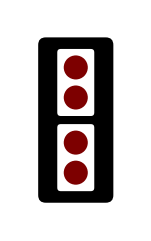

In [2048]:
figsize=(1*uf.cm, 2*uf.cm)
plt.figure(figsize=figsize, dpi=300)
draw_motif_pictogram(od.get_motif_labels()[15])

# Generate panel automatically

In [2096]:
cw_pairs = [
    [(2, 2), (1, 2), (4, 2)],
    [(2, 10), (1, 5), (4, 5)],
    [(6, 10), [], (4, 10)],
    [(5, 4), [], (4, 15)],
    [(5, 10), [], (3, 2)],
    [(5, 14), [], (3, 15)],
    [(7, 2), (7, 5), (7, 15)]
]


7


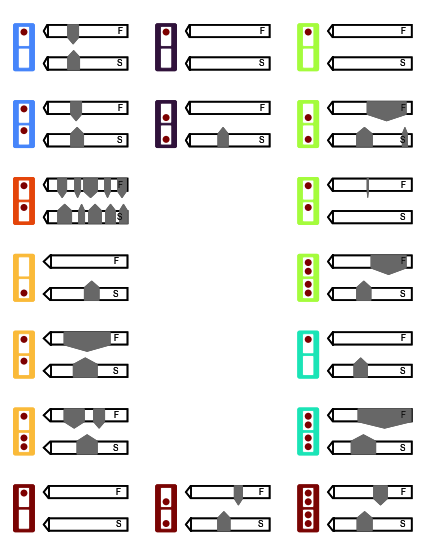

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

p_ranges = (5, 95)


c_circ = "#7d0000"
c_rect = "#676767"
# num_row = len(cw_pairs)
# num_col = 4
num_row = 7
num_col = 3

# ws_row = 0.002
ws_row = 0.01
ws_col = 0.05

wr = (1-(num_row+1)*ws_row)/num_row
wc = (1-(num_col+1)*ws_col)/num_col


fig = plt.figure(figsize=(9.5*uf.cm, 11.5*uf.cm), dpi=120)

for nr in range(num_row):
    for nc in range(len(cw_pairs[nr])):
        if len(cw_pairs[nr][nc]) == 0:
            continue
        
        
        cid, wid = cw_pairs[nr][nc]
        period_set = get_period(cid)
        if period_set[0] < 0: period_set[0] = 40

        # compute peaks
        te_data_2d = uf.load_pickle(os.path.join(te_dir, "te_%d%02d.pkl"%(cid, wid)))    
        te_data = tt.reduce_te_2d(te_data_2d, tcut=period_set[0])
        tlag = te_data["tlag"]

        tsig_sets = [[], []]
        for nd in range(2):
            x1 = te_data["te"][:,nd,:]
            x2 = te_data["te_surr"][:,nd,:]
            x1_mean = np.median(x1, axis=0)
            is_overlap = tt.check_overlap(x1, x2, p_ranges)
            tsig_sets[nd] = find_sig_times(x1_mean, is_overlap)
            
        # ax = axs[nr][nc]s
        pos = ((nc+1)*ws_col+nc*wc, 1-((nr+1)*ws_row+nr*wr)-wr, wc, wr)
        ax = plt.axes(pos)
            
        ax_te = ax.inset_axes([0.23, 0., 0.77, 1])
        fig.add_axes(ax_te)
        plt.sca(ax_te)
        xmax = period_set[0]
        box_height = 2
        visu.draw_round_rect(tsig_sets[0], xmax=xmax, y=y0, color=c_rect, rect_type="sharp", h=box_height,
                     alpha=1, lw=0.5, show_arrow=True, arrow_h=-box_height/2)
        visu.draw_round_rect(tsig_sets[1], xmax=xmax, y=0, color=c_rect, rect_type="sharp", h=box_height,
                     alpha=1, lw=0.5, show_arrow=True, arrow_h=box_height/2)
        visu.draw_reduce_axis(xmax=xmax, width=box_height*1.2, y=y0)
        plt.ylim([-3, y0+3])

        # draw indicator
        ax_pict = ax.inset_axes([0, 0.1, 0.2, 0.8])
        fig.add_axes(ax_pict)
        plt.sca(ax_pict)
        draw_motif_pictogram(od.get_motif_labels()[wid], rcolor=get_cid_color(cid), )

        ax.axis("off")
        
uf.save_fig("fig3_te_total")
plt.show()